In [1]:
#Load necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize


In [2]:
import tensorflow as tf
from scipy import stats
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from keras_preprocessing.sequence import pad_sequences 
from keras_preprocessing.text import Tokenizer


In [3]:
#importing the training data
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
imdb_data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
text=imdb_data['review'][0]
print(text)
print(word_tokenize(text))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [6]:
corpus=[]
for text in imdb_data['review']:
    words=[word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [7]:
num_words = len(corpus)
print(num_words)

50000


In [8]:
# Spliting data
x_train=imdb_data.review[:40000]
y_train=imdb_data.sentiment[:40000]
x_test=imdb_data.review[40000:]
y_test=imdb_data.sentiment[40000:]

In [9]:
#tokenizing the words and padding
#tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 50000, oov_token = "<OOV>")
tokenizer= Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)

x_train= tokenizer.texts_to_sequences(x_train)
x_train= pad_sequences(x_train, maxlen=128, truncating='post', padding='post')

In [10]:
x_train[0], len(x_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [11]:
tokenizer.fit_on_texts(x_test)
x_test= tokenizer.texts_to_sequences(x_test)
x_test= pad_sequences(x_test, maxlen=128, truncating='post', padding='post')

In [12]:
x_test[0], len(x_test[0])

(array([   86,   122,    10,   178,     5,   131,    12,    10,  7474,
         3824,    20,     1,   991,  2287,     2,    10,   255,     1,
           17,  2486,    10,  1323,     5,   103,     1,   223,  5955,
            4,     3,    19,    11,    17,   981,     3,   359,     5,
          212,  1018,   422,     9,    13,   212,  1377,    56,   230,
          405,   298,     4,   307,    23,   260,    19,   956,    12,
        22413,    12,    33,    67,    61,   215,    53,    16,    11,
          113,    13,   488,     2,     1,   102,    70,  5457,    15,
            1,    88,   173,     1,   469,   824,     8,     1,    64,
           66,    54,    49,  2377,    30,    29,    33,    90,    40,
        36477,    82,    47,   430,     4,     3,    74,   219,     2,
           10,   115,    21,    63,    12,    30,    29,   273,    10,
         1056,   137,    10,    77,    21,   118,    28,    13,     1,
           88,   175,     5,   715,  3399,   108,     8,     1,    17,
      

In [13]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(40000, 128) (40000,)
(10000, 128) (10000,)


In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)

In [15]:
#model creation
model= Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100,input_length=128,trainable=True))
model.add(LSTM(100, dropout=0.1, return_sequences=True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 100)          5000000   
                                                                 
 lstm (LSTM)                 (None, 128, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,160,901
Trainable params: 5,160,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
history= model.fit(x_train,y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
625/625 [==============================] - 311s 492ms/step - loss: 0.4222 - accuracy: 0.8061 - val_loss: 0.7983 - val_accuracy: 0.5914
Epoch 2/5
625/625 [==============================] - 292s 468ms/step - loss: 0.2362 - accuracy: 0.9113 - val_loss: 0.9129 - val_accuracy: 0.5755
Epoch 3/5
625/625 [==============================] - 308s 493ms/step - loss: 0.1557 - accuracy: 0.9441 - val_loss: 1.1218 - val_accuracy: 0.5771
Epoch 4/5
625/625 [==============================] - 329s 527ms/step - loss: 0.0990 - accuracy: 0.9663 - val_loss: 1.2573 - val_accuracy: 0.5680
Epoch 5/5
625/625 [==============================] - 335s 534ms/step - loss: 0.0739 - accuracy: 0.9763 - val_loss: 1.5689 - val_accuracy: 0.5732


C:\Users\no22324\AppData\Local\Temp\ipykernel_10360\3238955797.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')


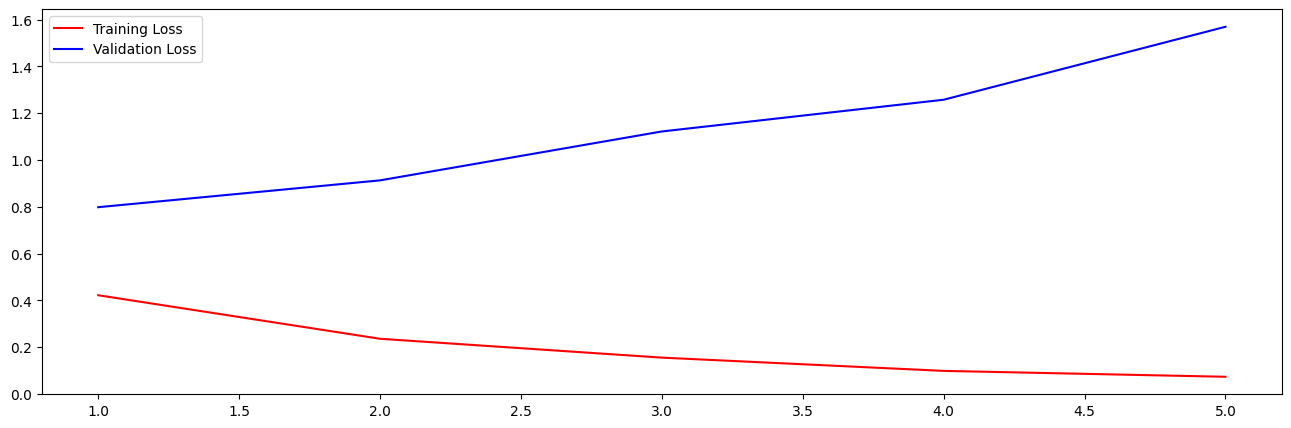

In [19]:
plt.figure(figsize=(16,5))
epochs=range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

C:\Users\no22324\AppData\Local\Temp\ipykernel_10360\2337257072.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')


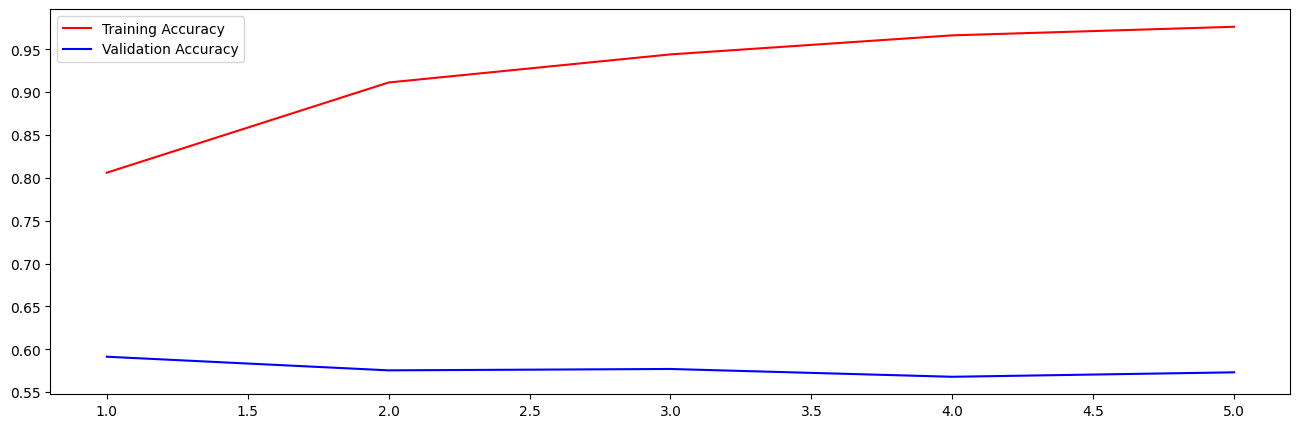

In [20]:
plt.figure(figsize=(16,5))
epochs=range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'],'b',label='Validation Accuracy')
plt.legend()
plt.show()

In [22]:
#Testing
validation_sentence=['The movie was good']
validation_sentence_tokened= tokenizer.texts_to_sequences(validation_sentence)
validation_sentence_padded=pad_sequences(validation_sentence_tokened, maxlen=128, truncating='post', padding='post')
print(f"probability of positive{format(model.predict(validation_sentence_padded)[0])}")

1/1 [==============================] - 0s 30ms/step
probability of positive[0.70815605]
